In [ ]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
import re
from sklearn.metrics import silhouette_score 

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
tokenized_project = [project.split() for project in new_corpus_customsp]

In [ ]:
tokenized_project

[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
ft_model = FastText(tokenized_project,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

In [ ]:
print(ft_model.wv['machine'])

[-0.76764315  0.53528404 -0.20609452 -0.20522054  0.06492512  0.39916983
 -0.3435461  -0.290133   -0.46892506 -0.38485166  0.11468384  0.250293
 -0.0640641   0.11565577  0.65066564  0.44640964 -0.5744579   0.328465
 -0.19817841 -0.33976552 -0.08902097  0.2675356  -0.42681432  0.18363628
 -0.45471638 -0.05012852  0.64928705 -0.24981646 -0.39145535  0.22405994
  0.25579253  0.69331855  0.64817023  0.10799842  0.15256324  0.09621469
  0.41367415 -0.25020844 -0.3373393  -0.10797558  0.03927924 -0.66495216
  0.10379286  0.28660202 -0.03921302  0.11869793 -0.2279182   0.39313358
 -0.1545599   0.23047474  0.15814476  0.47338054 -0.19510369 -0.67078906
 -0.6244616  -0.19113228  0.29497564  0.1661519   0.38683814  0.41032678]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(new_corpus_customsp)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.head(100)

term    weight
0         ability  0.001192
1            able  0.004981
2        academic  0.002572
3    acceleration  0.001185
4   accelerometer  0.002555
..            ...       ...
95      avoidance  0.001055
96            aws  0.001282
97           axis  0.001121
98     background  0.002525
99            bag  0.001333

[100 rows x 2 columns]

In [ ]:
weights_df.term[0]

'ability'

In [ ]:
 df1 = weights_df[weights_df['term']=='able'].index.values.astype(int)
 df1

array([1])

In [ ]:
df1 = weights_df[weights_df['term']=='able'].index.item()
df1

1

In [ ]:
weight_of_word = weights_df.weight[weights_df[weights_df['term']=='able'].index.item()]
weight_of_word

0.004981439267235893

In [ ]:
weight_of_word = weights_df.weight[weights_df[weights_df['term']=='generate'].index.item()]
weight_of_word

0.008212401824750519

In [ ]:
weights_df.weight[0]

0.0011923570256653477

In [ ]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    num_word = 0
    for word in sent:
        try:
            if num_word == 0:
                sent_vec = model[word]
            else:
                weight_of_word = weights_df.weight[weights_df[weights_df['term']==word].index.item()]
                sent_vec = np.add(sent_vec * weight_of_word,  model[word])
            num_word+=1
        except:
            pass
     
    return np.asarray(sent_vec) 

In [ ]:
X=[]
for sentence in tokenized_project:
    X.append(sent_vectorizer(sentence, ft_model))   
 

print (X)
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


[array([-0.45281294,  0.46014053, -0.10363355,  0.20531857,  0.0211071 ,
        0.47495645, -0.09858242,  0.3144413 ,  0.21056303, -0.2568302 ,
       -0.13453951, -0.10353237,  0.6806238 ,  0.33136973,  0.24530521,
       -0.650216  , -0.19435735, -0.12922631, -0.70609075, -0.4018908 ,
       -0.12213618, -0.3801233 , -0.7097468 ,  0.5417853 ,  0.11628129,
       -0.23746996,  0.06547524, -0.24116985, -0.08914807, -0.42060563,
       -0.00102796, -0.3712252 , -0.28680044,  0.17540927,  0.34867993,
        0.09322949,  0.24071716, -0.18324578, -0.13742326, -0.30186656,
        0.43921724, -0.19765927,  0.5343545 ,  0.8998192 ,  0.03962658,
       -0.181198  , -0.0045318 ,  0.10463901,  0.19167218,  0.4985345 ,
       -0.10403698, -0.10963069, -0.11604226, -0.15040304,  0.28792953,
        0.02932936, -0.13866076,  0.09311936, -0.19303226,  0.4565849 ],
      dtype=float32), array([-0.6401326 , -0.09242916,  0.9802936 , -1.4793538 , -1.062238  ,
        0.14717242,  0.37963608,  0.8196

In [ ]:
len(X)

628

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


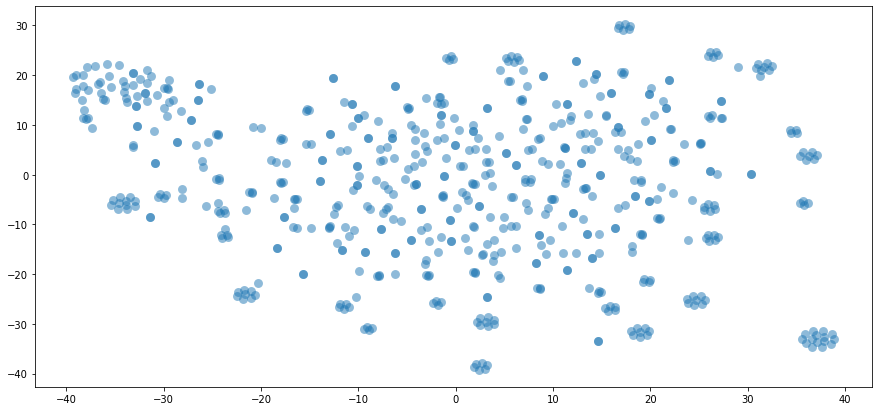

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(X, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


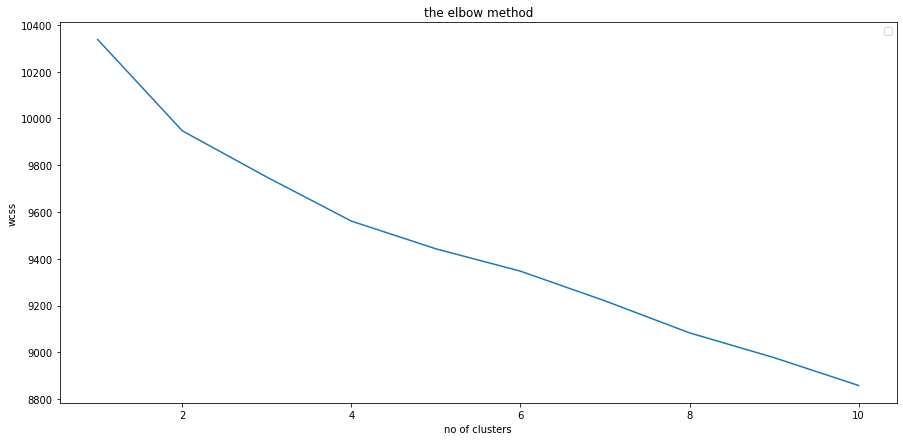

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 4 0 1 1 1 3 1 2 4 1 1 1 2 4 3 1 1 1 1 2 1 1 3 1 1 1 1 0 1 1 1 1 3 1 0 0
 1 1 1 0 1 1 1 4 3 0 1 1 3 1 1 1 3 3 3 3 1 1 3 0 2 1 2 4 1 2 2 1 3 1 3 3 1
 1 1 3 1 1 1 0 0 4 1 2 3 1 3 3 1 3 1 3 1 3 0 0 1 0 2 1 1 1 1 1 3 1 1 0 1 3
 1 3 1 1 1 2 1 2 1 0 1 1 0 3 2 0 2 4 1 1 1 1 0 1 2 1 1 1 2 0 0 1 0 1 0 1 2
 1 3 1 3 2 1 1 1 1 3 4 1 1 1 4 1 1 1 3 3 1 3 1 1 2 2 2 2 4 0 1 4 3 2 2 3 3
 4 1 1 1 3 1 1 3 3 3 1 1 3 1 1 1 1 1 3 1 1 1 1 3 0 1 0 1 4 1 1 3 2 2 1 2 1
 1 1 1 1 1 1 1 2 1 1 3 1 3 1 4 1 1 1 2 1 0 1 0 4 0 2 1 0 2 3 2 1 1 1 3 1 3
 2 1 2 1 1 4 1 2 3 1 0 2 4 0 3 0 1 1 1 3 3 3 1 1 1 0 1 1 3 1 2 1 3 3 1 1 1
 4 1 0 1 2 2 1 2 4 3 1 3 1 1 1 3 3 3 2 1 4 0 3 1 1 0 2 1 0 0 1 2 1 0 1 2 3
 1 1 1 1 2 1 1 0 1 1 1 0 0 1 1 3 4 1 1 3 1 3 3 1 3 1 1 0 1 3 1 3 1 4 0 1 2
 3 3 1 3 1 1 3 1 1 2 3 0 2 3 1 1 0 1 3 2 2 3 1 1 3 3 1 1 2 3 1 1 1 4 1 3 3
 1 1 2 2 3 1 1 4 3 1 1 3 1 1 3 1 1 1 1 2 1 1 3 1 2 1 4 1 1 4 0 1 3 4 3 3 0
 1 1 3 2 2 3 1 1 4 1 1 1 3 2 1 1 2 1 2 1 1 2 3 1 1 1 1 3 0 1 1 1 3 3 3 4 0
 1 1 1 1 1 3 1 1 1 1 1 3 

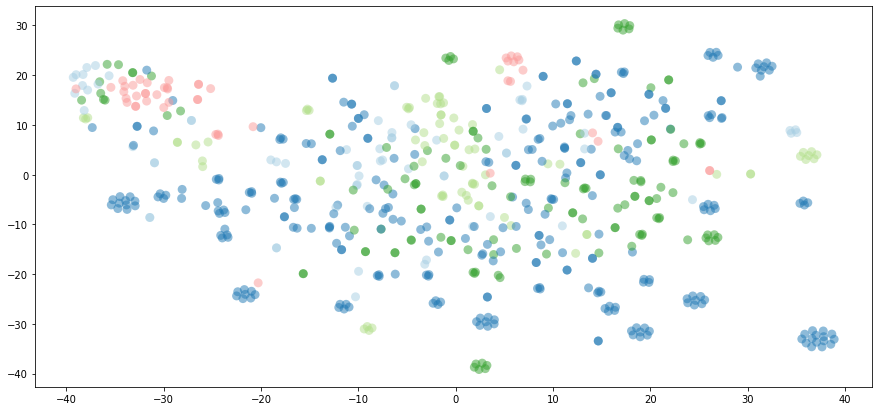

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[X] if X >= 0
                  else (0.5, 0.5, 0.5)
                  for X in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.06783117
For no of clusters = 3  The average silhouette_score is : 0.060629163
For no of clusters = 4  The average silhouette_score is : 0.047434237
For no of clusters = 5  The average silhouette_score is : 0.03802008
For no of clusters = 6  The average silhouette_score is : 0.04281446
For no of clusters = 7  The average silhouette_score is : 0.07194699
For no of clusters = 8  The average silhouette_score is : 0.046914667
For no of clusters = 9  The average silhouette_score is : 0.059067897
For no of clusters = 10  The average silhouette_score is : 0.028047465


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

67

In [ ]:
#projects in cluster 1
list1

['psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'designing software air collaborative robot detecting position aeroplane cracks corrosion inspection body aeroplane trained predefined images cracks corrosion lidar air cobot aircraft inspection capturing live image processing opencv labelling images labelme software',
 'heavy loads servers reduced ipfs warning red zones city',
 'chunking maximum entropy models koe https www aclweb org anthology w pdf baseline selects chunk tag frequently associated nthe speech tag',
 'resulting mape forward prediction interval novel attention nmultivariate time series id fan false negatives false positives test samples deploying month nrunning simulation integrated control loop trip logic equipment understudy avoid false alarms nprogram interpretable operator expected crore annual savings deployment module terms sh

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.head(100)

term    weight
0      account  0.033246
1        alert  0.012328
2    algorithm  0.044662
3   algorithms  0.025659
4     analysis  0.027666
..         ...       ...
77  university  0.027639
78     varying  0.022033
79         vec  0.025839
80    vehicles  0.038274
81     website  0.027704

[82 rows x 2 columns]

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of psnr is : 1
Frequency of currently is : 1
Frequency of drafting is : 1
Frequency of paperforthe is : 1
Frequency of algorithm is : 11
Frequency of reconstruction is : 1
Frequency of k is : 4
Frequency of space is : 2
Frequency of superresolution is : 1
Frequency of images is : 8
Frequency of nmri is : 1
Frequency of lot is : 1
Frequency of faster is : 2
Frequency of highly is : 1
Frequency of sub is : 3
Frequency of sampled is : 1
Frequency of knee is : 1
Frequency of mri is : 1
Frequency of forthe is : 1
Frequency of packed is : 1
Frequency of imaginary is : 1
Frequency of nand is : 2
Frequency of parts is : 2
Frequency of fourier is : 1
Frequency of designing is : 2
Frequency of software is : 5
Frequency of air is : 2
Frequency of collaborative is : 1
Frequency of robot is : 4
Frequency of detecting is : 1
Frequency of position is : 2
Frequency of aeroplane is : 2
Frequency of cracks is : 2
Frequency of corrosion is : 2
Frequency of inspection is : 2
Frequency of body is

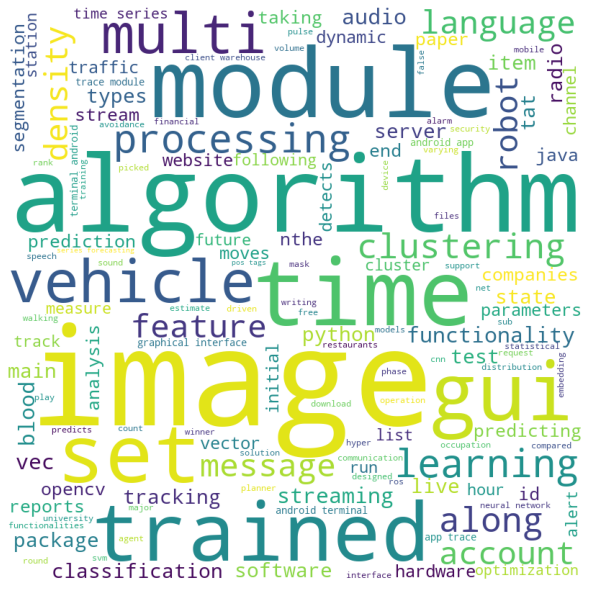

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

311

In [ ]:
list2

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters l

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
266           image  0.035674
310        learning  0.035389
371         network  0.029003
268          images  0.028491
458          python  0.028300
374          neural  0.026232
4          accuracy  0.024909
573         trained  0.023912
18         analysis  0.023272
209        features  0.022786
314            like  0.022278
12        algorithm  0.022055
353          models  0.021430
325         machine  0.021371
304        language  0.020929
89   classification  0.020916
151            deep  0.018408
29              app  0.017109
569            time  0.016837
13       algorithms  0.015786
452      processing  0.015667
479      regression  0.015243
373        networks  0.015184
208         feature  0.015167
521             set  0.015096
234        generate  0.014777
104             cnn  0.014502
567            text  0.014335
472     recognition  0.014107
324            lstm  0.012912

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 4
Frequency of duplication is : 1
Frequency of faces is : 5
Frequency of major is : 5
Frequency of challenges is : 3
Frequency of dup is : 1
Frequency of algorithm is : 36
Frequency of complexity is : 2
Frequency of means is : 2
Frequency of time is : 29
Frequency of get is : 20
Frequency of answer is : 10
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 5
Frequency of solved is : 3
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 2
Frequency of achieve is : 11
Frequency of tradeoff is : 1
Frequency of precision is : 4
Frequency of recall is : 4
Frequency of improves is : 1
Frequency of score is : 19
Frequency of machine is : 37
Frequency of learning is : 75
Frequency of collecting is : 2
Frequency of training is : 19
Frequency of accuracy is : 52
Frequency of classification is : 40
Frequency of basis is : 5
Frequency of position is : 4
Frequency of camera is : 5
Frequency of flowneta is : 1
F

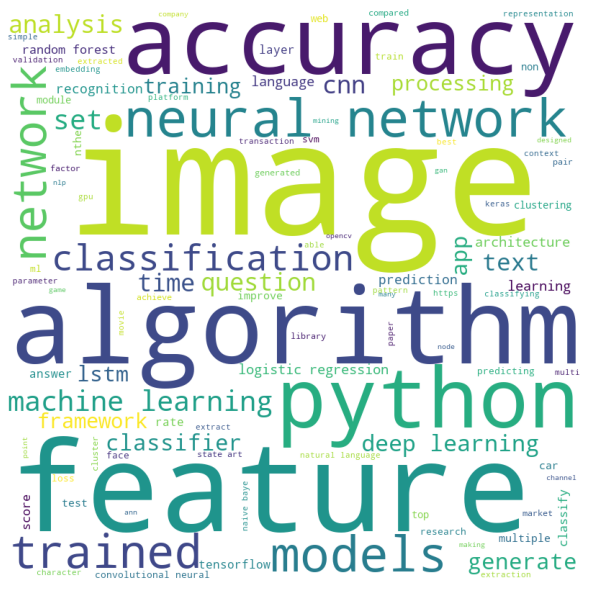

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

73

In [ ]:
list3

['algorithm dynamic maze moving obstacles path source destination',
 'autonomous humanoid agents playing soccer intelligently simulated nenvironment following physics rule soccer optimized like walking kicking factor x evolutionary strategies cma es ever simspark humanoid gym openai rl nalgorithms trpo ddpg optimize passing dodging defense positioning modules voronoi point map nping hungarian algorithm active attacker selection secured nd position goalie scientific finished th league undergraduate qualify ever competition',
 'sms messages cleaning visualization predicting sms spam ham algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com spam sms detector',
 'multiple modules deep learning networks like cnn rnn gru lstm multiple assignments applying deep learning network models nfashionmnist multi class natural image classification cifar',
 'accounting reasons wastage water farm conceiveing features developing models could total cost total returns ty

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
6       android  0.104921
8           app  0.067642
27          end  0.057489
44         java  0.048986
7           api  0.046906
87      website  0.046887
74       server  0.045388
59      network  0.040743
81         time  0.039862
41        image  0.037686
73       python  0.037590
4     algorithm  0.037297
48         like  0.034519
57        mysql  0.032997
70   principles  0.032559
47     learning  0.032472
40          iit  0.031113
19     database  0.029264
45   javascript  0.028835
68          php  0.028361
67        phone  0.028036
26       driver  0.027816
86          web  0.027261
20         deep  0.026608
46     language  0.026465
16       course  0.025554
28  engineering  0.025496
51          map  0.025471
31     features  0.025466
50      machine  0.024543

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of algorithm is : 7
Frequency of dynamic is : 1
Frequency of maze is : 1
Frequency of moving is : 2
Frequency of obstacles is : 2
Frequency of path is : 1
Frequency of source is : 2
Frequency of destination is : 1
Frequency of autonomous is : 1
Frequency of humanoid is : 2
Frequency of agents is : 1
Frequency of playing is : 1
Frequency of soccer is : 2
Frequency of intelligently is : 1
Frequency of simulated is : 1
Frequency of nenvironment is : 1
Frequency of following is : 1
Frequency of physics is : 1
Frequency of rule is : 1
Frequency of optimized is : 1
Frequency of like is : 10
Frequency of walking is : 1
Frequency of kicking is : 1
Frequency of factor is : 1
Frequency of x is : 2
Frequency of evolutionary is : 1
Frequency of strategies is : 1
Frequency of cma is : 1
Frequency of es is : 1
Frequency of ever is : 2
Frequency of simspark is : 1
Frequency of gym is : 1
Frequency of openai is : 1
Frequency of rl is : 1
Frequency of nalgorithms is : 1
Frequency of trpo is :

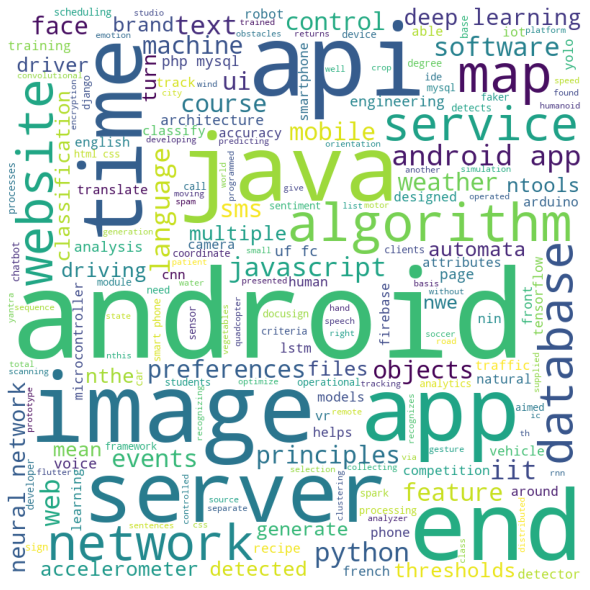

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

130

In [ ]:
list4

['leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'clients many erps sap oracle financial maintain financial though erps captured analysis remains client audit analytics platform transform interface conducting exploratory analysis visualization analytics tools anomaly duplication top designing scripts get erps etl scripts transform understanding business problems crating interactive exploration visualization templates feature engineering training anomaly algorithms',
 'independent features exploratory analysis cleaning visualization models classifying diabetes algorithms logistic regression svm decision tree random forest python accuracy end end web app link https bit ly dt z',
 'scraping module extract disease web newspapers last years instituted unsupervised classifier sentiment analyser categorize articles types effect reader temporal regio

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
7     algorithms  0.042744
75          game  0.028543
102     learning  0.028317
8       analysis  0.028187
168          set  0.027713
140     platform  0.026108
6      algorithm  0.025676
210      website  0.025520
107         link  0.024182
189         time  0.024102
1       accuracy  0.023634
66      features  0.023107
192      trained  0.022018
121    modelling  0.021268
120      methods  0.021133
104         like  0.020948
128       neural  0.020119
90         image  0.019673
212        words  0.019096
122       models  0.019060
151       random  0.018987
126      network  0.018646
183      systems  0.018300
79       genetic  0.018229
169   similarity  0.018156
153  recognition  0.017238
143    predicted  0.017110
45          deep  0.016843
32      classify  0.016534
98          java  0.016411

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 1
Frequency of telecom is : 2
Frequency of firm is : 2
Frequency of predictive is : 2
Frequency of models is : 11
Frequency of risk is : 5
Frequency of churn is : 4
Frequency of main is : 2
Frequency of indicators is : 2
Frequency of filtered is : 3
Frequency of revenue is : 1
Frequency of generate is : 3
Frequency of tagging is : 1
Frequency of churned is : 2
Frequency of service is : 2
Frequency of usage is : 5
Frequency of also is : 15
Frequency of strong is : 2
Frequency of clients is : 1
Frequency of many is : 4
Frequency of erps is : 3
Frequency of sap is : 1
Frequency of oracle is : 1
Frequency of financial is : 3
Frequency of maintain is : 2
Frequency of though is : 1
Frequency of captured is : 1
Frequency of analysis is : 17
Frequency of remains is : 1
Frequency of client is : 4
Frequency of audit is : 1
Frequency of analytics is : 5
Frequency of platform is : 12
Frequency of transform is : 2
Frequency of interface is : 3
Frequency of conducting is : 

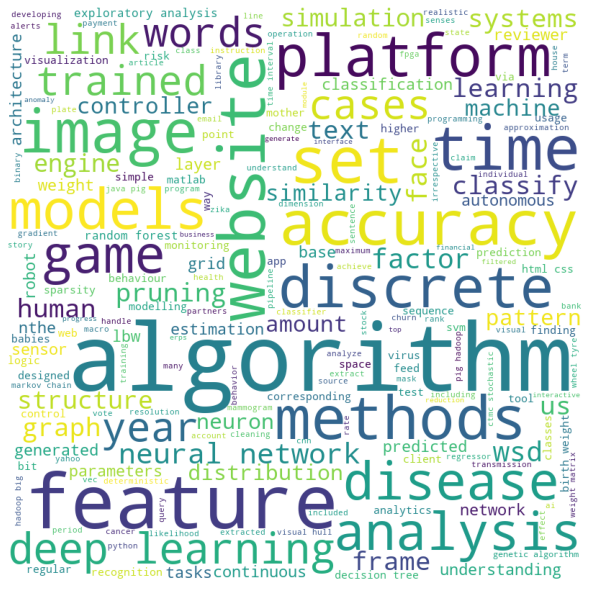

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

47

In [ ]:
list5

['analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'author python library einsteinpy library computations nrelativity geodesic equations solving odes visualisations summer gsoc openastronomy numbrella along standalone organisation esa socis set ci cd test automation documentation forthe codebase research university toronto cern nstudying negative matter effect gravitational lensing sponsored python software foundation numfocus esa',
 'client wanted entities documents due documents size taking lot time manually automate names entities recognition entity disambiguation',
 'leading contributors python library poliastro astrodynamics npython dedicated problems orbit propagation solution lamberts nproblem conversion position velocity vectors classical orbital nelements orbit plotting f

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
46            text  0.068552
47            time  0.062684
28        modeling  0.062661
20        learning  0.058969
2         analysis  0.058788
36          python  0.053802
13            deep  0.044871
8           cities  0.044630
7         checking  0.044486
16        features  0.043622
25       marketing  0.042862
30          module  0.041946
37  recommendation  0.041747
33            nthe  0.040604
21            like  0.040439
32          neural  0.040075
29          models  0.039397
41           sales  0.038916
11        computer  0.038844
43          signal  0.038373
42             sas  0.036735
5        bootstrap  0.036074
38    registration  0.035074
44       sponsored  0.034279
24         machine  0.034065
12         control  0.034000
23           linux  0.033586
40            risk  0.032892
4             best  0.031614
9   classification  0.030985

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyze is : 1
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 2
Frequency of forging is : 1
Frequency of companys is : 2
Frequency of comparison is : 1
Frequency of peers is : 1
Frequency of fundamental is : 1
Frequency of analysis is : 10
Frequency of financial is : 3
Frequency of statements is : 1
Frequency of calculated is : 4
Frequency of relevant is : 1
Frequency of ratios is : 2
Frequency of evaluate is : 1
Frequency of status is : 1
Frequency of liquidity is : 1
Frequency of financing is : 1
Frequency of compared is : 1
Frequency of best is : 6
Frequency of performer is : 1
Frequency of sector is : 1
Frequency of bharat is : 2
Frequency of forge is : 1
Frequency of author is : 1
Frequency of python is : 6
Frequency of library is : 3
Frequency of einsteinpy is : 1
Frequency of computations is : 1
Frequency of nrelativity is : 1
Frequency of geodesic is : 1
Frequency of equations is : 1
Frequency of solving is : 1
Frequency of odes is : 1

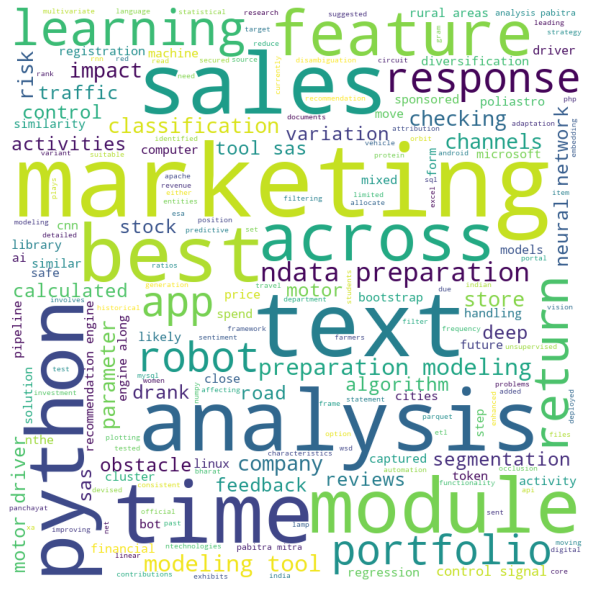

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 